IMAGE CLASSIFIER

In [1]:
# Import Packages
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

2025-02-17 14:12:24.027151: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-17 14:12:24.030680: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-17 14:12:24.039908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739801544.054563   13818 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739801544.058898   13818 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-17 14:12:24.080619: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Dataset found at: /workspaces/image-classifier-project-tutorial/PetImages
Categories in dataset: ['Cat', 'Dog']
Image shape: (150, 150, 3)


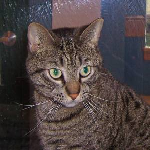

In [3]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the correct dataset path
dataset_path = "/workspaces/image-classifier-project-tutorial/PetImages"

# Check if the dataset folder exists
if not os.path.exists(dataset_path):
    print(f"Error: Dataset path '{dataset_path}' not found!")
else:
    print(f"Dataset found at: {dataset_path}")

# List the files inside the dataset directory
print("Categories in dataset:", os.listdir(dataset_path))

# Load an example image
sample_image_path = os.path.join(dataset_path, "Cat", "1.jpg")  # Adjust "Cat" or "Dog" as needed

if os.path.exists(sample_image_path):
    image = load_img(sample_image_path, target_size=(150, 150))  # Resize image
    image_array = img_to_array(image) / 255.0  # Normalize pixel values

    # Show image details
    print("Image shape:", image_array.shape)
    image.show()  # Display image
else:
    print(f"Error: Image '{sample_image_path}' not found!")


In [5]:
# Import and Check first 9 Dog Pictures

# Path to the directory containing your image data
data_dir = "/workspaces/image-classifier-project-tutorial/PetImages"

# Get a list of all dog image file names
dog_subfolder = os.path.join(data_dir, "Dog")

# Get a list of all dog image file names
dog_image_files = os.listdir(dog_subfolder)

# Load the first nine dog images
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

# Create a single figure to display all nine images
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

AttributeError: 'Image' object has no attribute 'load_img'

Folder found: /workspaces/image-classifier-project-tutorial/PetImages/Dog


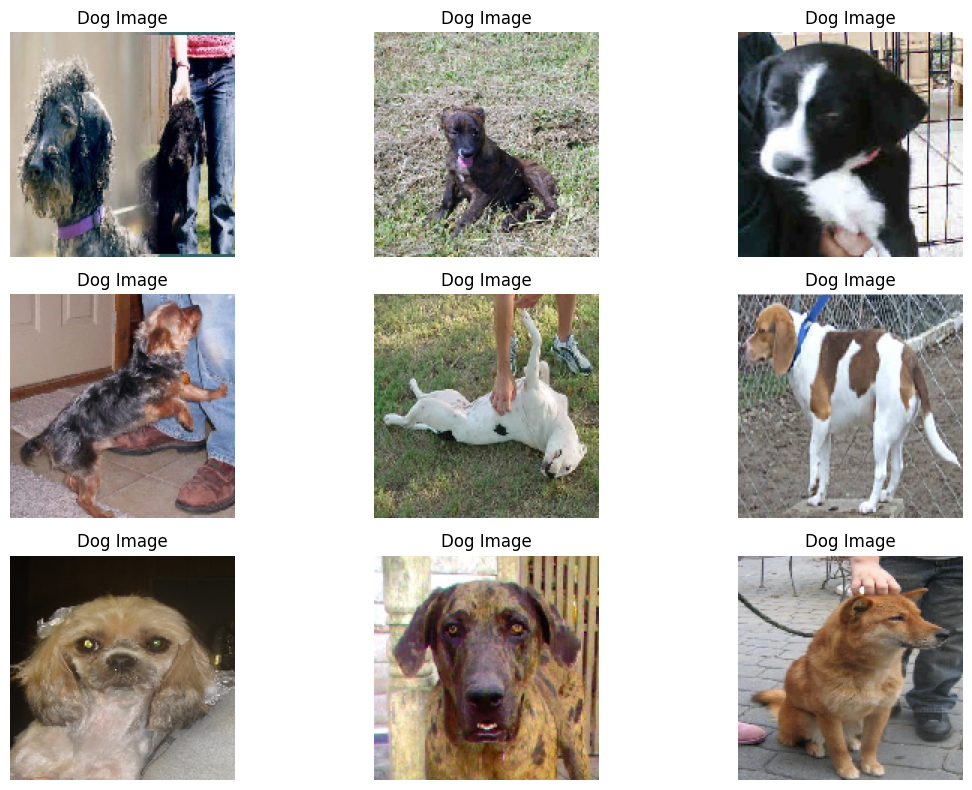

In [6]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # ✅ FIXED IMPORTS

# Path to the directory containing your image data
data_dir = "/workspaces/image-classifier-project-tutorial/PetImages"

# Fix: Ensure correct folder name (should be "Dog", not "dog")
dog_subfolder = os.path.join(data_dir, "Dog")  # Capitalized "Dog"

# Check if the folder exists
if not os.path.exists(dog_subfolder):
    print(f"Error: Folder '{dog_subfolder}' not found!")
else:
    print(f"Folder found: {dog_subfolder}")

# Get a list of all dog image file names
dog_image_files = os.listdir(dog_subfolder)

# Load the first nine dog images
dog_images = []
for i in range(min(9, len(dog_image_files))):  # Prevent index error if < 9 images exist
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    
    try:
        img = load_img(img_path, target_size=(150, 150))  # ✅ FIXED: Use load_img correctly
        img_array = img_to_array(img) / 255.0  # ✅ FIXED: Use img_to_array correctly
        dog_images.append(img_array)
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")

# Create a single figure to display all nine images
plt.figure(figsize=(12, 8))

for i in range(len(dog_images)):  # Handle cases where < 9 images are loaded
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()


Folder found: /workspaces/image-classifier-project-tutorial/PetImages/Cat


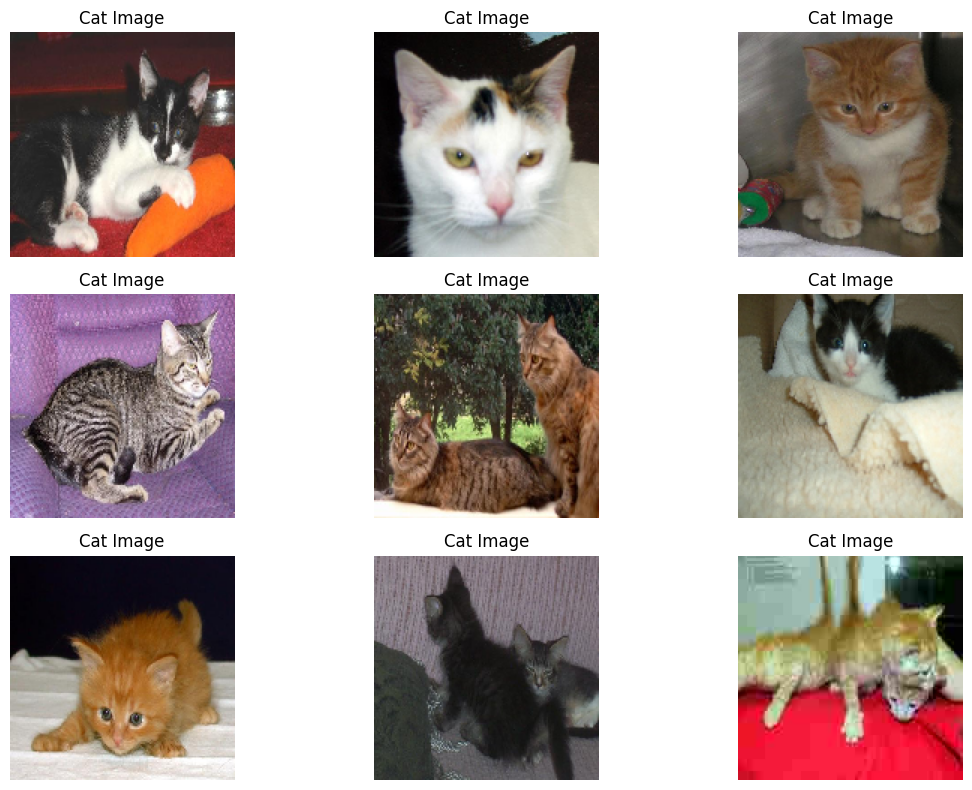

In [7]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # ✅ Correct imports

# Path to the directory containing your image data
data_dir = "/workspaces/image-classifier-project-tutorial/PetImages"

# Fix: Ensure correct folder name (should be "Cat", not "cat")
cats_subfolder = os.path.join(data_dir, "Cat")  # Capitalized "Cat"

# Check if the folder exists
if not os.path.exists(cats_subfolder):
    print(f"Error: Folder '{cats_subfolder}' not found!")
else:
    print(f"Folder found: {cats_subfolder}")

# Get a list of all cat image file names
cats_image_files = os.listdir(cats_subfolder)

# Load the first nine cat images
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limit to available cat images
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    
    try:
        img = load_img(img_path, target_size=(150, 150))  # ✅ Use load_img correctly
        img_array = img_to_array(img) / 255.0  # ✅ Normalize pixel values
        cats_images.append(img_array)
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")

# Create a single figure to display all cat images
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):  # Handle cases where < 9 images are loaded
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()


CREATE IMAGES DATA SETS

In [8]:
from keras.preprocessing.image import ImageDataGenerator

# Define a few rules for DataGen
train_dir = "../data/raw"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["test"] 
)

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/home/codespace/.python/current/lib/python3.12/site-packages/keras/api/preprocessing/image/__init__.py)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # ✅ Corrected import

# Define a few rules for DataGen
train_dir = "/workspaces/image-classifier-project-tutorial/PetImages"  # ✅ Corrected path
image_size = (200, 200)

# Initialize ImageDataGenerators
datagentrain = ImageDataGenerator(rescale=1./255)  # ✅ Normalize pixel values
datagentest = ImageDataGenerator(rescale=1./255)

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode="binary",
    classes=["Dog", "Cat"]  # ✅ Capitalized class names to match folder names
)

# Test Data Generation (Fix class names)
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode=None,  # ✅ No labels for test data
    classes=["Dog", "Cat"]  # ✅ Corrected class names
)


Found 25000 images belonging to 2 classes.
Found 25000 images belonging to 2 classes.


tranning

In [10]:
# Move the Data Through the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-17 15:57:57.909053: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-02-17 15:57:58.434003: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2025-02-17 15:57:59.123765: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2025-02-17 15:57:59.305854: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memo

In [1]:
# Compile the Model using Adam 
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

2025-02-18 00:35:12.435230: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-18 00:35:18.702933: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-18 00:35:21.541862: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739838926.115044    2259 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739838927.151127    2259 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-18 00:35:35.518693: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

NameError: name 'model' is not defined

In [12]:
# Train the Model
model.fit(train_data, epochs = 1)

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 25088, but received input with shape (None, 18432)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 200, 200, 3), dtype=float32)
  • training=True
  • mask=None

In [13]:
print(train_data.class_indices)


{'Dog': 0, 'Cat': 1}


In [16]:
import os
from PIL import Image

# Define dataset path
dataset_path = "/workspaces/image-classifier-project-tutorial/PetImages"

def remove_corrupt_images(folder_path):
    """
    Scans the dataset folder and removes corrupt images.
    """
    for category in ["Dog", "Cat"]:  # Ensure correct folder names
        category_path = os.path.join(folder_path, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                img = Image.open(img_path)  # Try opening the image
                img.verify()  # Verify image integrity
                img.close()  # Close image file after verification
            except (IOError, SyntaxError, Image.DecompressionBombError):
                print(f"Removing corrupt image: {img_path}")
                os.remove(img_path)  # Delete corrupt image

# Run the cleaner
remove_corrupt_images(dataset_path)


Removing corrupt image: /workspaces/image-classifier-project-tutorial/PetImages/Dog/11702.jpg


/home/codespace/.local/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Removing corrupt image: /workspaces/image-classifier-project-tutorial/PetImages/Cat/666.jpg


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/workspaces/image-classifier-project-tutorial/PetImages"
image_size = (200, 200)

# Ensure correct class names match folder structure
datagentrain = ImageDataGenerator(rescale=1./255)

train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode="binary",
    classes=["Dog", "Cat"]  # Ensure class names match your folder structure
)

# Retry training
model.fit(train_data, epochs=1)


Found 24998 images belonging to 2 classes.


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-02-17 16:33:35.995206: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75497472 exceeds 10% of free system memory.
2025-02-17 16:33:36.575707: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 160579584 exceeds 10% of free system memory.


305/782 ━━━━━━━━━━━━━━━━━━━━ 10:38 1s/step - accuracy: 0.5606 - loss: 1.1384

/home/codespace/.local/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


307/782 ━━━━━━━━━━━━━━━━━━━━ 10:35 1s/step - accuracy: 0.5608 - loss: 1.1359

: 

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define image size
image_size = (200, 200, 3)  # (height, width, channels)

# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=image_size),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # ✅ Changed output to 1 neuron with sigmoid
])

# ✅ Fix: Use binary_crossentropy for two-class classification
model.compile(
    loss="binary_crossentropy",  # ✅ Changed loss function
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# ✅ Train the Model
model.fit(train_data, epochs=1)


2025-02-17 16:33:15.266391: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-17 16:33:15.518022: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-17 16:33:15.729488: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739809995.987414   77972 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739809996.072381   77972 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-17 16:33:16.704678: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

NameError: name 'train_data' is not defined

In [1]:
import os
from PIL import Image

# Define dataset path
dataset_path = "/workspaces/image-classifier-project-tutorial/PetImages"

def remove_corrupt_images(folder_path):
    """
    Scans the dataset folder and removes corrupt images safely.
    """
    for category in ["Dog", "Cat"]:  # Ensure correct folder names
        category_path = os.path.join(folder_path, category)
        image_files = os.listdir(category_path)

        for img_name in image_files:
            img_path = os.path.join(category_path, img_name)
            try:
                with Image.open(img_path) as img:  # Use 'with' to ensure file closes
                    img.verify()  # Verify image integrity
            except (IOError, SyntaxError, Image.DecompressionBombError):
                print(f"Removing corrupt image: {img_path}")
                os.remove(img_path)  # Delete corrupt image

# Run the cleaner
remove_corrupt_images(dataset_path)


/home/codespace/.local/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/workspaces/image-classifier-project-tutorial/PetImages"
image_size = (200, 200)

# Use a smaller batch size to avoid memory overload
datagentrain = ImageDataGenerator(rescale=1./255)

train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=16,  # ✅ Reduce batch size from 32 to 16
    class_mode="binary",
    classes=["Dog", "Cat"]
)

# Retry training
model.fit(train_data, epochs=1)


2025-02-17 16:42:34.713294: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-17 16:42:35.016050: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-17 16:42:35.150198: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739810555.471301   82048 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739810555.528014   82048 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-17 16:42:36.186083: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Found 24998 images belonging to 2 classes.


NameError: name 'model' is not defined

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define image size
image_size = (200, 200, 3)  # (height, width, channels)

# Rebuild the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=image_size),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (Dog vs Cat)
])

# Compile the Model Again
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

print("✅ Model redefined successfully!")


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-17 16:44:21.833546: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-02-17 16:44:21.915751: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75497472 exceeds 10% of free system memory.
2025-02-17 16:44:22.027374: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75497472 exceeds 10% of free system memory.


✅ Model redefined successfully!


2025-02-17 16:44:22.070463: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75497472 exceeds 10% of free system memory.


In [4]:
model.fit(train_data, epochs=1)


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-02-17 16:44:45.005446: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75497472 exceeds 10% of free system memory.
2025-02-17 16:44:46.001702: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 80289792 exceeds 10% of free system memory.


 339/1563 ━━━━━━━━━━━━━━━━━━━━ 12:48 628ms/step - accuracy: 0.5351 - loss: 0.8799

/home/codespace/.local/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1049s 670ms/step - accuracy: 0.5970 - loss: 0.7151


In [6]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("/workspaces/image-classifier-project-tutorial/PetImages, target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")

SyntaxError: unterminated string literal (detected at line 4) (1125290155.py, line 4)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/workspaces/image-classifier-project-tutorial/models/vgg16_1.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

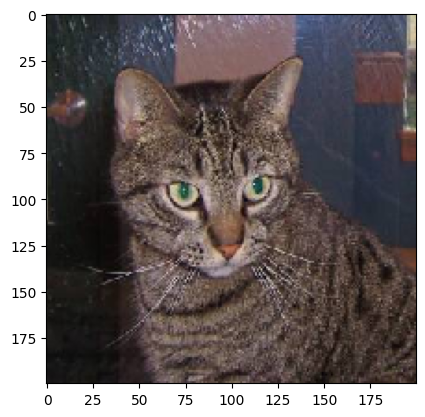

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# ✅ Correct the path to an actual image file (adjust file name)
img_path = "/workspaces/image-classifier-project-tutorial/PetImages/Cat/1.jpg"  # Update with a real file

# ✅ Properly format image loading with target_size as an argument
img = image.load_img(img_path, target_size=(200, 200))

# Convert image to array
img = np.asarray(img)

# Display image
plt.imshow(img)

# Expand dimensions to match the model input
img = np.expand_dims(img, axis=0)

# ✅ Correct model path
saved_model = load_model("/workspaces/image-classifier-project-tutorial/models/vgg16_1.h5")  # Ensure correct path

# Make a prediction
output = saved_model.predict(img)

# Print result
if output[0][0] > output[0][1]:
    print("Cat")
else:
    print("Dog")


In [4]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model (without top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Freeze the base model layers
base_model.trainable = False

# Build the new model on top of VGG16
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (Dog vs Cat)
])

# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Train the model
model.fit(train_data, epochs=5)

# Save the model
model.save("/workspaces/image-classifier-project-tutorial/models/vgg16_1.h5")

print("✅ Model trained and saved as 'vgg16_1.h5'")


2025-02-17 17:23:45.078277: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


2025-02-17 17:23:47.840525: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 163840000 exceeds 10% of free system memory.
2025-02-17 17:23:48.226210: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 163840000 exceeds 10% of free system memory.
2025-02-17 17:23:48.937584: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 40960000 exceeds 10% of free system memory.
2025-02-17 17:23:48.991647: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 81920000 exceeds 10% of free system memory.
2025-02-17 17:23:49.333727: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 81920000 exceeds 10% of free system memory.


   5/1563 ━━━━━━━━━━━━━━━━━━━━ 2:12:50 5s/step - accuracy: 0.5481 - loss: 1.1264

: 

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
train_dir = "/workspaces/image-classifier-project-tutorial/PetImages"
image_size = (200, 200)

# Ensure correct class names match folder structure
datagentrain = ImageDataGenerator(rescale=1./255)

train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=16,  # ✅ Reduced batch size to avoid memory issues
    class_mode="binary",
    classes=["Dog", "Cat"]
)

print("✅ Dataset loaded successfully!")


2025-02-17 17:23:21.216954: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-17 17:23:21.495589: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-17 17:23:21.664101: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739813001.882156  101090 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739813001.956643  101090 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-17 17:23:22.555601: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Found 24998 images belonging to 2 classes.
✅ Dataset loaded successfully!


In [3]:
model.fit(train_data, epochs=5)


NameError: name 'model' is not defined

In [2]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("../data/raw/test/9.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/test/9.jpg'